# Time series: Implementing naive Forecast


## Forcasting the historical mean

In [1]:
import pandas as pd 
# load the data
df = pd.read_csv('jj.csv')

df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [2]:
df['date'] = pd.to_datetime(df['date'])

 To make the split, we’ll specify that our train set(1960 to 1979) will contain all the data held in df
except the last four entries. The test set will be composed of only the last four entries.
This is what the next code block does:

In [3]:
train = df[:-4]
test = df[-4:]




## Implementing the historic mean baseline

In [4]:
# we can start with getting the arithmatic mean of the entire train set. 

import numpy as np 
hist_mean = np.mean(train['data'])
hist_mean

np.float64(4.308499987499999)

this means that from 1960 to 1979, the quaterly EPS of j&j is averagely 4.31

this will now be naively forcusted to 1980

    # we will create a new colum called pred_mean an and store the hist_mean there. 
    

In [5]:
test.loc[:,'pred_mean'] = hist_mean  # seting hist mean as the forecust

test

/tmp/ipykernel_15341/733926253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'pred_mean'] = hist_mean  # seting hist mean as the forecust


,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


To know the performance of the forecast, we find the Mean Absolute Pervcentage Error. 

In [6]:
def mape(y_true,y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

In [7]:
mape_hist_mean = mape(test['data'], test['pred_mean'])
mape_hist_mean

np.float64(70.00752579965119)

Running the function gives a MAPE of 70.00%. This means that our baseline deviates
by 70% on average from the observed quarterly EPS of Johnson & Johnson in 1980.
 Let’s visualize our forecasts to better understand our MAPE of 70%.

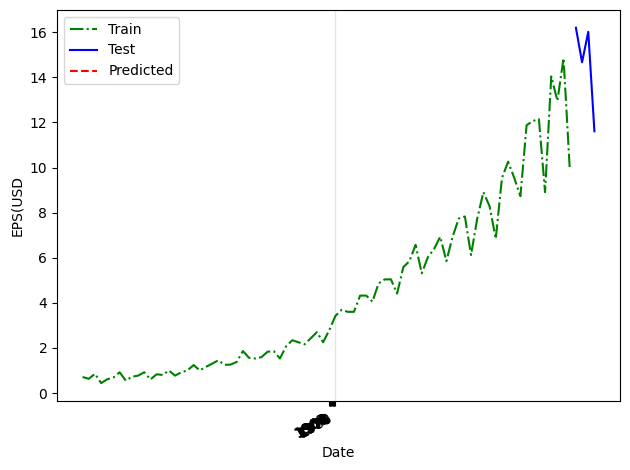

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots() # initializing a fig and ax objects. the fig can have maor than 1 ax objects 
# so we can have a figur with several plots. 
ax.plot(train['date'], train['data'], 'g-.', label='Train')
#g-. is green dash and dot.
ax.plot(test['date'], test['data'], 'b-', label='Test')
# test plot with red dash line
ax.plot(test['data'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date') # set x label as date & y as said
ax.set_ylabel('EPS(USD')
ax.axvspan(80,83, color ='#808080', alpha=0.2)
# a rectangylar area, color cgay oppecity 20%
ax.legend(loc=2)
# we display every 2 years.
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 
1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()


## Takeaways

we can see a positive trend on the trainoing set. 
we have a trend that is not constant.(it gets steeper)

way to improve our baseline
while still using the mean? Do you think that taking the mean of a shorter and more
recent period of time would help? 

In [9]:
# we take the mean of the last year ( the last 4 data points in train)
last_year_mean= np.mean(train.data[-4:])
last_year_mean

np.float64(12.96)

The last year mean will be forcuasted as next years prediction.

In [10]:
test.loc[:, 'pred_last_yr_mean']= last_year_mean

/tmp/ipykernel_15341/3559626950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_yr_mean']= last_year_mean


In [11]:
mape_last_year_mean = mape(test['data'], test['pred_last_yr_mean'])

mape_last_year_mean

np.float64(15.5963680725103)

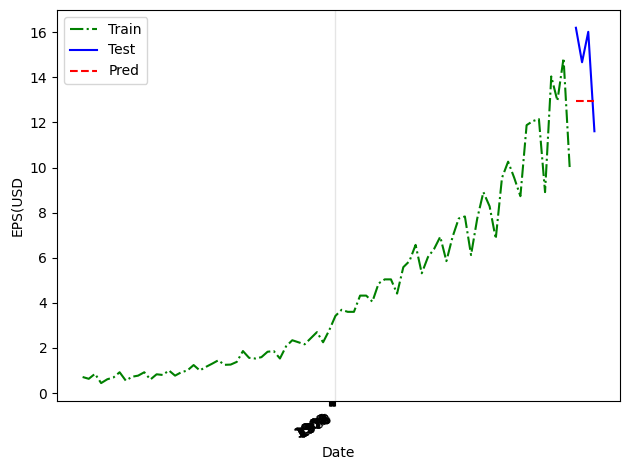

In [12]:
# we can plot this
fig, ax = plt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'],'b-', label='Test')
ax.plot(test['date'], test['pred_last_yr_mean'], 'r--', label='Pred' )
ax.set_xlabel('Date') # set x label as date & y as said
ax.set_ylabel('EPS(USD')
ax.axvspan(80,83, color ='#808080', alpha=0.2)
# a rectangylar area, color cgay oppecity 20%
ax.legend(loc=2)
# we display every 2 years.
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 
1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

## Predicting using the last known value. 

In [13]:
last = train.data.iloc[-1]

last

np.float64(9.99)

In [14]:
test.loc[:, 'pred_last'] = last

/tmp/ipykernel_15341/155972364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last'] = last


In [15]:
mape_last = mape(test['data'], test['pred_last'])
mape_last

np.float64(30.457277908606535)

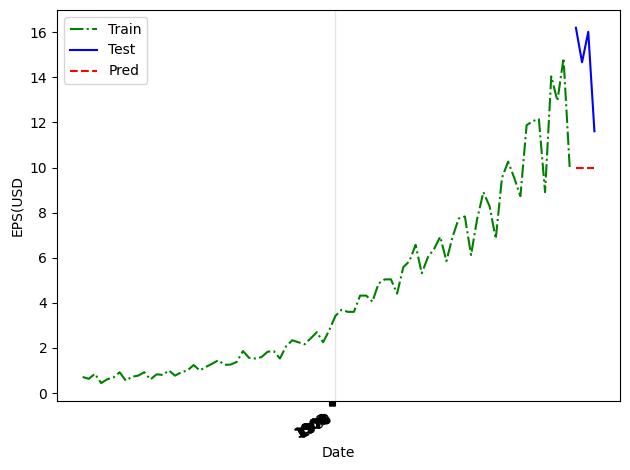

In [16]:
fig, ax = plt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'],'b-', label='Test')
ax.plot(test['date'], test['pred_last'], 'r--', label='Pred' )
ax.set_xlabel('Date') # set x label as date & y as said
ax.set_ylabel('EPS(USD')
ax.axvspan(80,83, color ='#808080', alpha=0.2)
# a rectangylar area, color cgay oppecity 20%
ax.legend(loc=2)
# we display every 2 years.
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 
1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

## Seasonal forecast

In [17]:
test.loc[:,'pres_last_season'] = train['data'][-4:].values

/tmp/ipykernel_15341/700841008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:,'pres_last_season'] = train['data'][-4:].values


In [18]:
#calculating the mape
mape_nave_seasonal = mape(test['data'], test['pres_last_season'])

mape_nave_seasonal

np.float64(11.561658552433654)

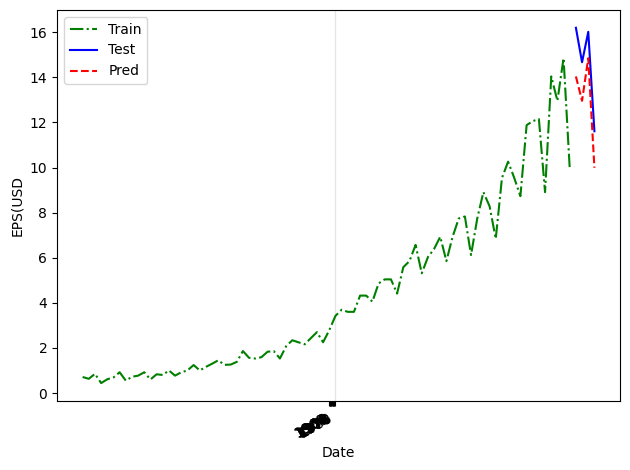

In [19]:
fig, ax = plt.subplots()
ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'],'b-', label='Test')
ax.plot(test['date'], test['pres_last_season'], 'r--', label='Pred' )
ax.set_xlabel('Date') # set x label as date & y as said
ax.set_ylabel('EPS(USD')
ax.axvspan(80,83, color ='#808080', alpha=0.2)
# a rectangylar area, color cgay oppecity 20%
ax.legend(loc=2)
# we display every 2 years.
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 
1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

# Going on a random walk


 Identifying a random walk process



 Understanding the ACF function



 Classifying differencing, stationarity, and white 
noise



 Using the ACF plot and differencing to identify 
a random walk



 Forecasting a random walk 